#  K-Nearest Neighbors (KNN) – Short Description

K-Nearest Neighbors (KNN) is a **supervised, non-parametric, and lazy learning algorithm** used for classification and regression tasks.

##  How KNN Works

1. It stores all the training data during the training phase.
2. When a new data point needs to be predicted:
   - It calculates the distance (usually Euclidean distance) between the new point and all training points.
   - It selects the **K nearest neighbors**.
   - For classification, it assigns the class based on **majority voting** among those neighbors.

##  Key Characteristics

- No explicit model is built during training (lazy learning).
- Performance depends heavily on:
  - Proper feature scaling
  - Choice of K value
- Small K → Overfitting risk  
- Large K → Underfitting risk  

KNN is simple, intuitive, and works well when the dataset is properly scaled and the optimal K value is selected.


#  Problem Statement

The objective of this project is to develop a machine learning model to classify breast tumors as **Benign (B)** or **Malignant (M)** using the Breast Cancer dataset.  

The dataset contains multiple numerical features extracted from digitized images of breast cell nuclei, such as radius, texture, perimeter, area, smoothness, and concavity.

The goal is to:

- Build a classification model using the **K-Nearest Neighbors (KNN)** algorithm.
- Experiment with different values of **K**.
- Analyze model performance.
- Identify overfitting and underfitting conditions.
- Determine the optimal value of K that gives the best test accuracy.

---

#  Approach

## 1️ Data Cleaning
- Dropped unnecessary columns (`id`, `Unnamed: 32`).
- Encoded the target variable `diagnosis` into numerical form.

## 2️ Feature and Target Separation
- Separated independent variables (X) and target variable (y).

## 3️ Train-Test Split
- Split the dataset into training and testing sets.
- Training data is used to train the model.
- Testing data is used to evaluate performance.

## 4️ Feature Scaling
- Applied **StandardScaler** to normalize numerical features.
- Fitted scaler only on training data to prevent data leakage.
- Transformed both training and testing datasets.

## 5️ Model Training
- Used **K-Nearest Neighbors (KNN)** classifier.
- Allowed dynamic selection of K value.
- Added validation to ensure K is within valid range.

## 6️ Model Evaluation
- Evaluated performance using:
  - Accuracy Score
  - Confusion Matrix
  - Classification Report
- Compared different K values to identify:
  - Overfitting (small K)
  - Underfitting (large K)
  - Optimal K (balanced performance)


#  Learning & Analysis from KNN Experiment

From the experimentation with different K values, we observed how the choice of K directly impacts model performance.

- For very small K (e.g., K = 1), the model showed good accuracy but has a higher risk of overfitting because it relies on very few neighbors.
- For moderate K values (K = 3, 5, 10), the model achieved the best balance between bias and variance.
- The highest accuracy was achieved at **K = 5 (95.61%)**, indicating optimal generalization on unseen data.
- As K increased further (e.g., 100, 200), accuracy started decreasing, showing signs of underfitting.
- At extremely large K (K = 455), the model predicted only the majority class, leading to severe underfitting and poor minority class performance.

This experiment clearly demonstrates:

- Small K → High variance (Overfitting risk)
- Large K → High bias (Underfitting risk)
- Optimal K → Balanced bias-variance tradeoff

Overall, KNN performed well on this dataset after proper feature scaling, and selecting the right K value was crucial for achieving the best performance.


In [99]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/colab_data/data.csv")
df.shape

(569, 33)

In [2]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [5]:
df.duplicated().sum()

np.int64(0)

# Remove Unwanted Columns

In [6]:
df=df.drop(["id","Unnamed: 32"],axis=1)

In [7]:
df.shape

(569, 31)

In [13]:
num_col=df.select_dtypes(exclude=["object"])
cat_col=df.select_dtypes(include=["object"])

In [14]:
num_col

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [15]:
cat_col

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [16]:
df["diagnosis"].value_counts()

,count
diagnosis,
B,357
M,212


# Encoded Target variable apply LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["diagnosis"]=le.fit_transform(df["diagnosis"])

In [18]:
df["diagnosis"].value_counts()

,count
diagnosis,
0,357
1,212


# Analyze the class distribution

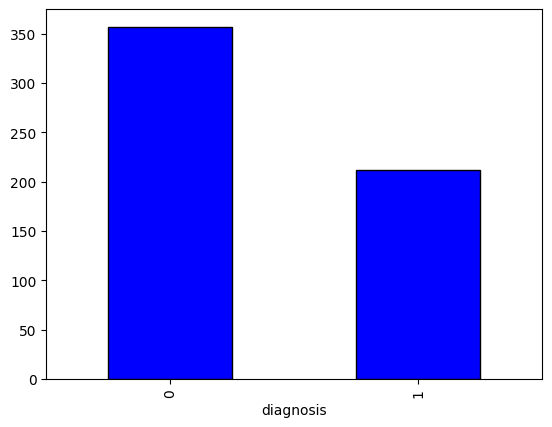

In [20]:
import matplotlib.pyplot as plt
df["diagnosis"].value_counts().plot(kind="bar",color="blue",edgecolor="black")
plt.show()

In [23]:
X=df.drop("diagnosis",axis=1)
y=df["diagnosis"]

In [35]:
df.shape

(569, 31)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

In [41]:
X_train.shape

(455, 30)

In [42]:
X_test.shape

(114, 30)

# Before apply scalling(HIST PLOT)

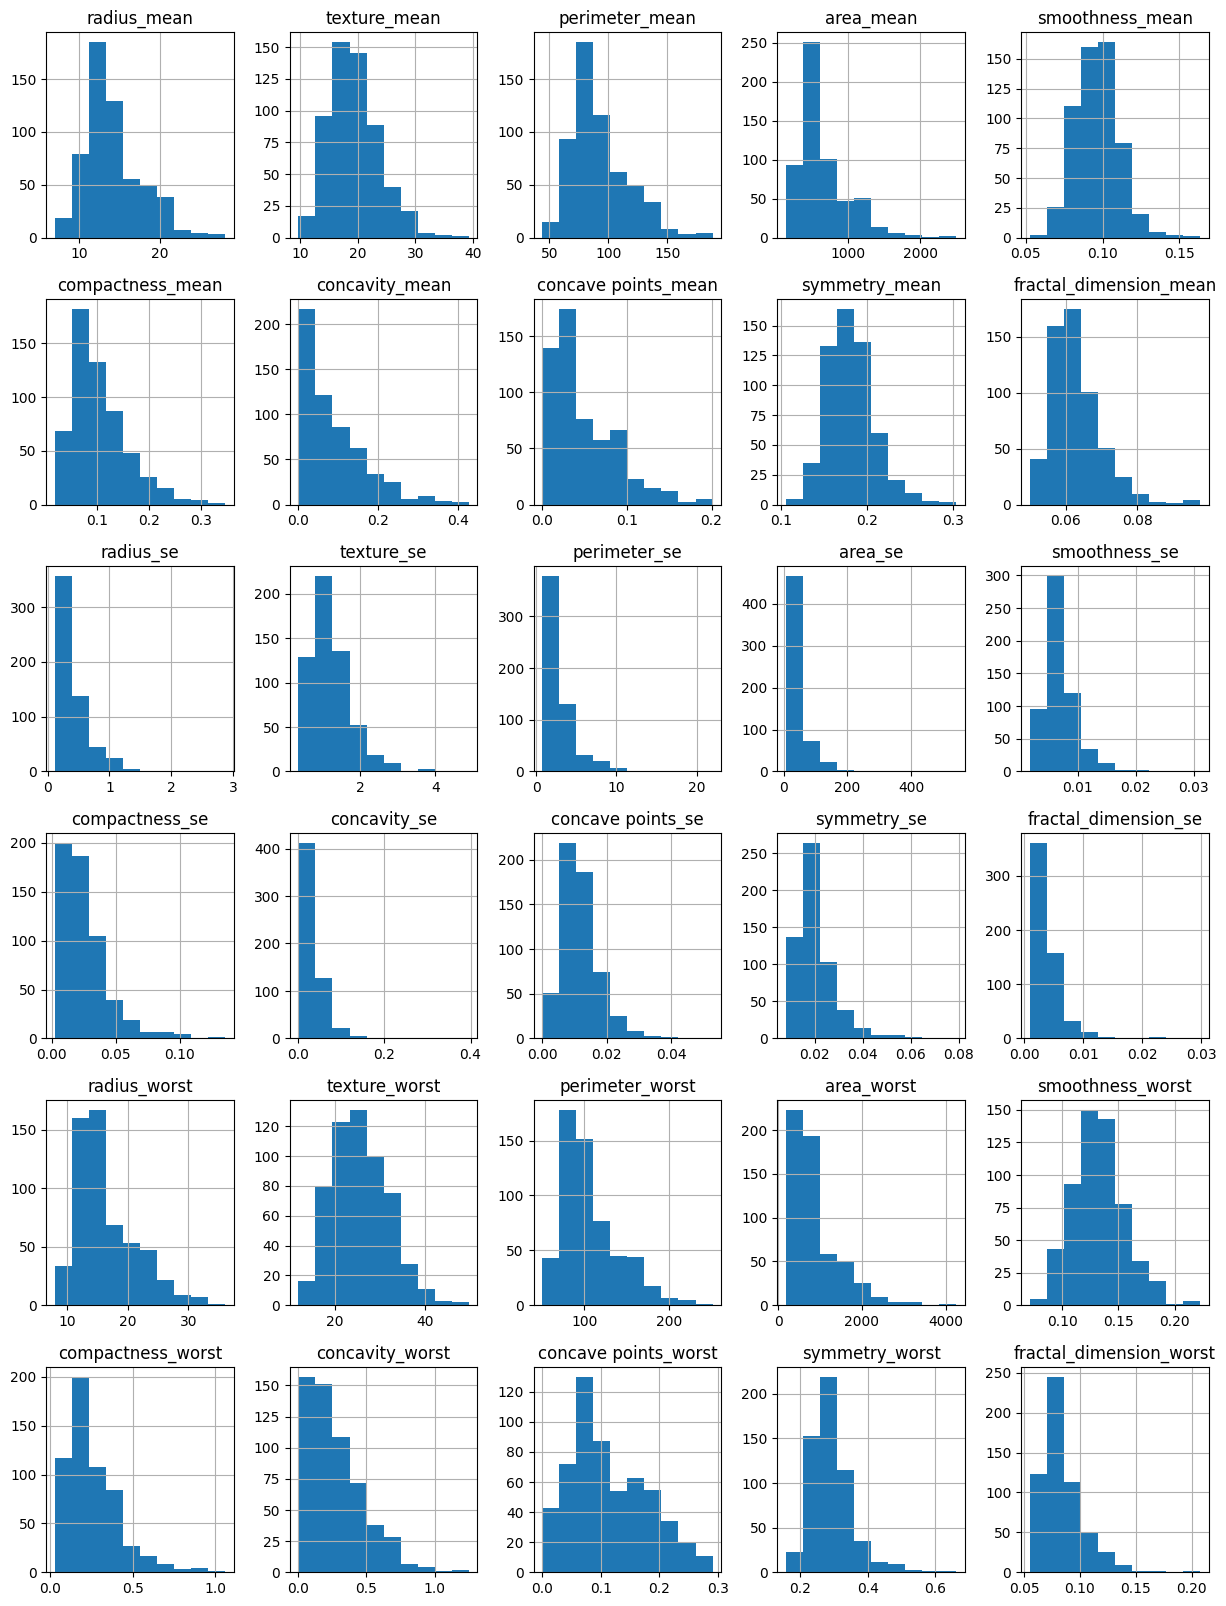

In [24]:
X.hist(figsize=(15,20))
plt.show()

In [25]:
X.skew()

,0
radius_mean,0.942380
texture_mean,0.650450
perimeter_mean,0.990650
area_mean,1.645732
smoothness_mean,0.456324
compactness_mean,1.190123
concavity_mean,1.401180
concave points_mean,1.171180
symmetry_mean,0.725609
fractal_dimension_mean,1.304489


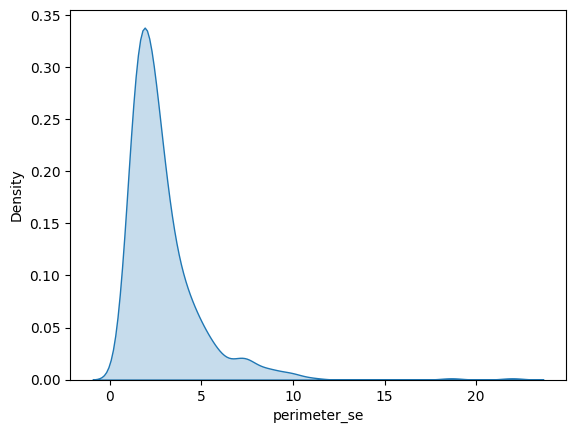

In [43]:
sns.kdeplot(df['perimeter_se'],fill=True)
plt.show()



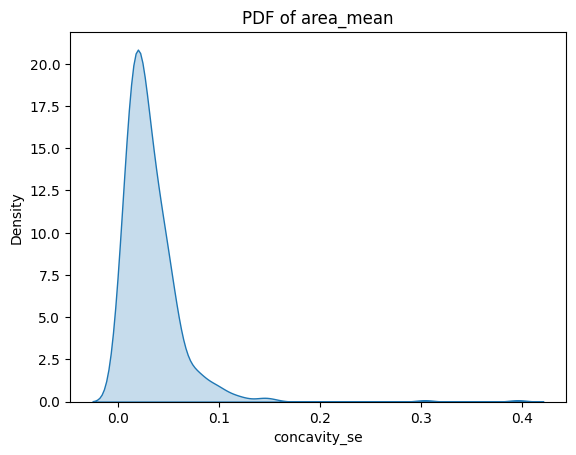

In [31]:
sns.kdeplot(df['concavity_se'], fill=True)
plt.title("PDF of area_mean")
plt.show()


# Apply StandardScaler on input features

In [45]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
X_train=sd.fit_transform(X_train)
X_test=sd.transform(X_test)


In [46]:
X_train

array([[ 0.51855873,  0.89182579,  0.4246317 , ..., -0.23574392,
         0.05456632,  0.02183673],
       [-0.51636409, -1.63971029, -0.54134872, ..., -0.32320788,
        -0.13757624, -0.90440164],
       [-0.36811839,  0.45551496, -0.38824993, ..., -0.89082504,
        -0.675893  , -0.14401559],
       ...,
       [-0.32616206,  1.33280304, -0.38905998, ..., -0.84289958,
        -0.96490082, -1.16888375],
       [ 0.00948859,  0.25952507,  0.00786279, ...,  0.27571059,
        -0.60284707, -0.30545988],
       [ 0.80945595,  0.36918608,  0.79320285, ...,  1.00657384,
        -0.46151907, -0.44817001]])

In [50]:
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

# After apply StandardScaler(HIST PLOT)

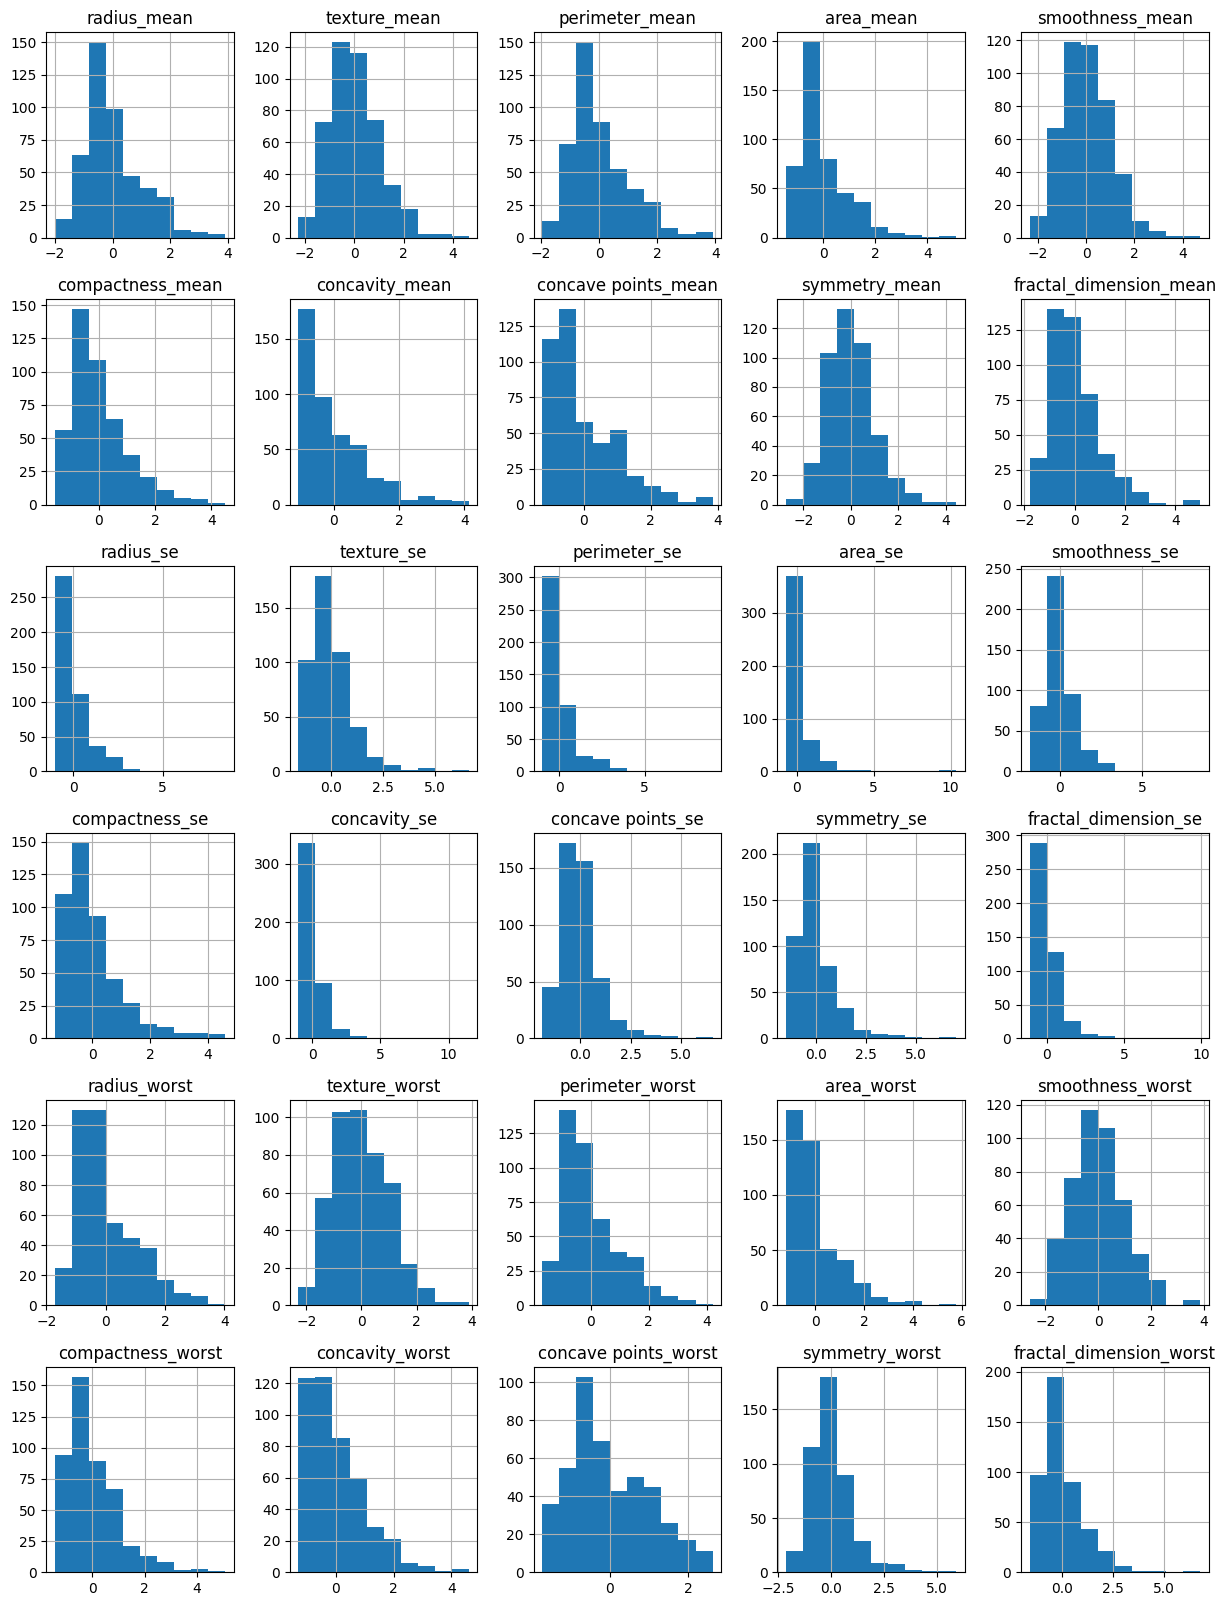

In [49]:
X_train.hist(figsize=(15,20))
plt.show()

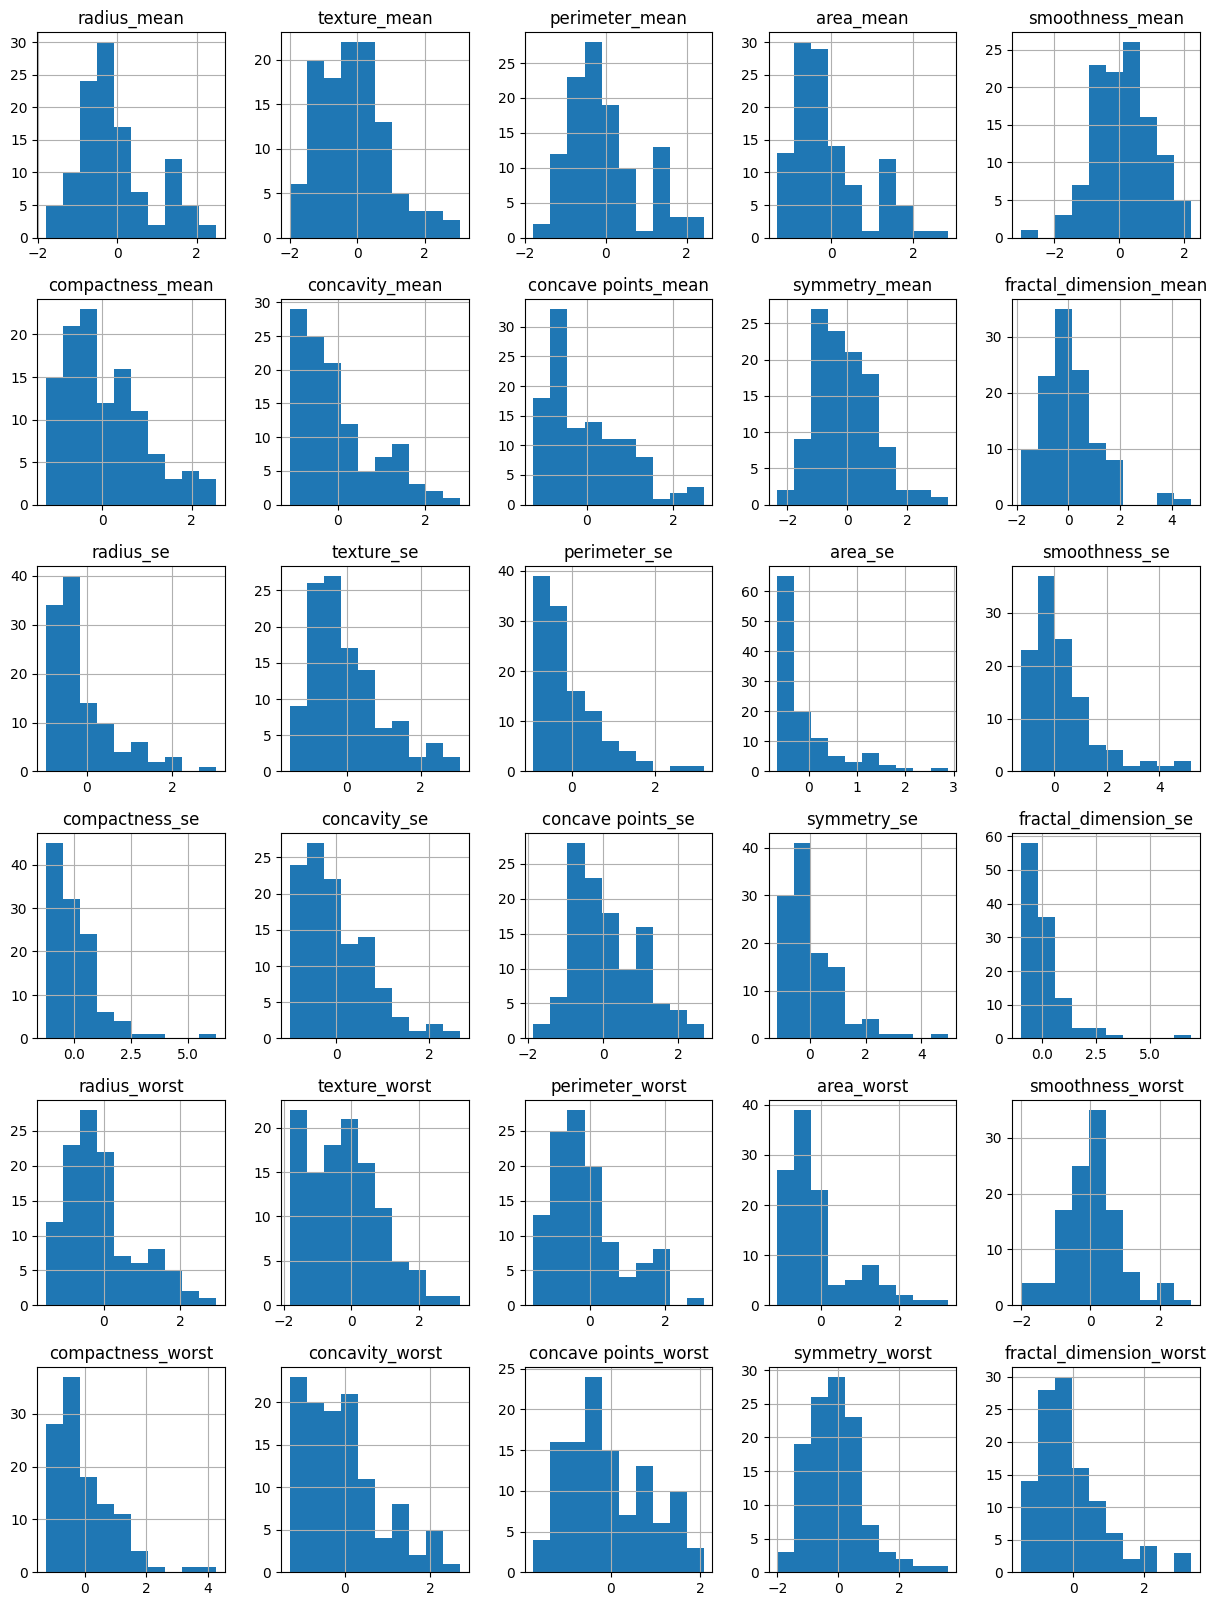

In [51]:
X_test.hist(figsize=(15,20))
plt.show()

# TRAIN MODEL WITH KNN (SEE THE PERFORMANCE ON DIFFERENT K VALUES)

In [57]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.neighbors import KNeighborsClassifier
KNN1=KNeighborsClassifier(n_neighbors=5)
KNN1.fit(X_train,y_train)
y_pred=KNN1.predict(X_test)



In [58]:
print("accuracy_score:",accuracy_score(y_test,y_pred))

accuracy_score: 0.956140350877193


In [69]:
print("\nclassification_report:\n",classification_report(y_test,y_pred))


classification_report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [70]:
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred))


confusion_matrix:
 [[71  1]
 [ 6 36]]


In [62]:
KNN2=KNeighborsClassifier(n_neighbors=3)
KNN2.fit(X_train,y_train)
y_pred2=KNN2.predict(X_test)

In [63]:
print("accuracy_score:",accuracy_score(y_test,y_pred2))

accuracy_score: 0.9385964912280702


In [68]:
print("\ncalssification_report:\n",classification_report(y_test,y_pred2))


calssification_report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [66]:
print("\nconfusion_matrix\n",confusion_matrix(y_test,y_pred2))


confusion_matrix
 [[71  1]
 [ 6 36]]


In [87]:
KNN3=KNeighborsClassifier(n_neighbors=15)
KNN3.fit(X_train,y_train)
y_pred3=KNN3.predict(X_test)

In [88]:
print("accuracy_score:",accuracy_score(y_test,y_pred3))

accuracy_score: 0.9473684210526315


In [89]:
print("\nclassification_report:\n",classification_report(y_test,y_pred3))


classification_report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [ ]:
print("")

In [81]:
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred3))


confusion_matrix:
 [[71  1]
 [ 5 37]]


In [75]:
KNN4=KNeighborsClassifier(n_neighbors=1)
KNN4.fit(X_train,y_train)
y_pred4=KNN4.predict(X_test)

In [76]:
print("\naccuracy_score:\n",accuracy_score(y_test,y_pred4))


accuracy_score:
 0.9298245614035088


In [77]:
print("\nclassification_report:\n",classification_report(y_test,y_pred4))


classification_report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114



In [93]:
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred4))


confusion_matrix:
 [[69  3]
 [ 5 37]]


In [90]:
KNN5=KNeighborsClassifier(n_neighbors=454)
KNN5.fit(X_train,y_train)
y_pred5=KNN5.predict(X_test)

In [91]:
print("accuracy_score:",accuracy_score(y_test,y_pred5))

accuracy_score: 0.631578947368421


In [92]:
print("\nclassification_report:\n",classification_report(y_test,y_pred5))


classification_report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [94]:
print("\nconfusion_matrix:\n",confusion_matrix(y_test,y_pred5))


confusion_matrix:
 [[72  0]
 [42  0]]


> ## **Note:** Instead of training multiple separate models for different K values, we use an interactive loop that allows the user to input various K values dynamically and analyze model performance (accuracy, confusion matrix, and classification report) in a single execution.


In [101]:

while True:

    k = int(input("\nEnter K value (Enter 0 to stop): "))
    if k == 0:
        print("Stopped.")
        break
    if k < 1:
        print("K must be greater than 0")
        continue
    if k > len(X_train):
        print("K cannot be greater than training samples")
        continue
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("\n----------------------------")
    print(f"Results for K = {k}")
    print("----------------------------")
    print("Accuracy:", round(acc,4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Enter K value (Enter 0 to stop): 1

----------------------------
Results for K = 1
----------------------------
Accuracy: 0.9298
Confusion Matrix:
 [[69  3]
 [ 5 37]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95        72
           1       0.93      0.88      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


Enter K value (Enter 0 to stop): 3

----------------------------
Results for K = 3
----------------------------
Accuracy: 0.9386
Confusion Matrix:
 [[71  1]
 [ 6 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



----------------------------
Results for K = 455
----------------------------
Accuracy: 0.6316
Confusion Matrix:
 [[72  0]
 [42  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114


Enter K value (Enter 0 to stop): 0
Stopped.


#  Learning & Analysis from KNN Experiment

From the experimentation with different K values, we observed how the choice of K directly impacts model performance.

- For very small K (e.g., K = 1), the model showed good accuracy but has a higher risk of overfitting because it relies on very few neighbors.
- For moderate K values (K = 3, 5, 10), the model achieved the best balance between bias and variance.
- The highest accuracy was achieved at **K = 5 (95.61%)**, indicating optimal generalization on unseen data.
- As K increased further (e.g., 100, 200), accuracy started decreasing, showing signs of underfitting.
- At extremely large K (K = 455), the model predicted only the majority class, leading to severe underfitting and poor minority class performance.

This experiment clearly demonstrates:

- Small K → High variance (Overfitting risk)
- Large K → High bias (Underfitting risk)
- Optimal K → Balanced bias-variance tradeoff

Overall, KNN performed well on this dataset after proper feature scaling, and selecting the right K value was crucial for achieving the best performance.
